In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [4]:
# Load the data
df = pd.read_csv('uber.csv')

# Display first few rows of the dataset
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [5]:
 # Display the shape and information of the dataset
print(df.shape)
print(df.info())


(200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


In [6]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [8]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)
# Verify that all missing values are removed
print("Missing values after dropping:\n", df.isnull().sum())


Missing values after dropping:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [9]:
# Function to calculate distance using the Haversine formula
def haversine(lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  # Convert degrees to radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat / 2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon / 2.0)**2))
    return km

In [10]:
# Calculate distance traveled per ride using the Haversine formula
df['Distance'] = haversine(df['pickup_longitude'], df['dropoff_longitude'], df['pickup_latitude'], df['dropoff_latitude'])


In [11]:
# Round the distance to 2 decimal points
df['Distance'] = df['Distance'].astype(float).round(2)

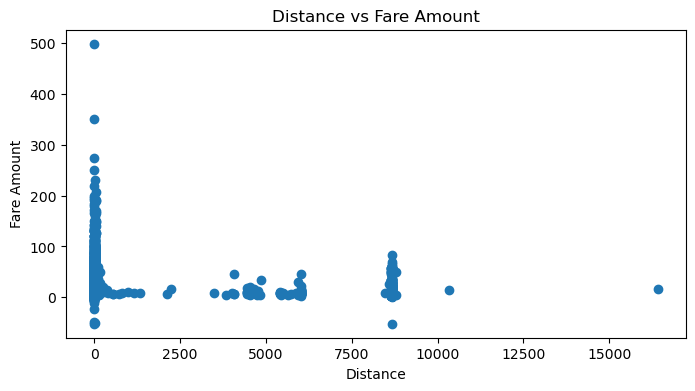

In [12]:
# Plot the relationship between distance and fare amount
plt.figure(figsize=(8, 4))
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.title("Distance vs Fare Amount")
plt.show()


In [13]:
# Remove outliers
df.drop(df[df['Distance'] > 60].index, inplace=True)
df.drop(df[df['Distance'] == 0].index, inplace=True)
df.drop(df[df['fare_amount'] <= 0].index, inplace=True)
df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 1)].index, inplace=True)
df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 100)].index, inplace=True)


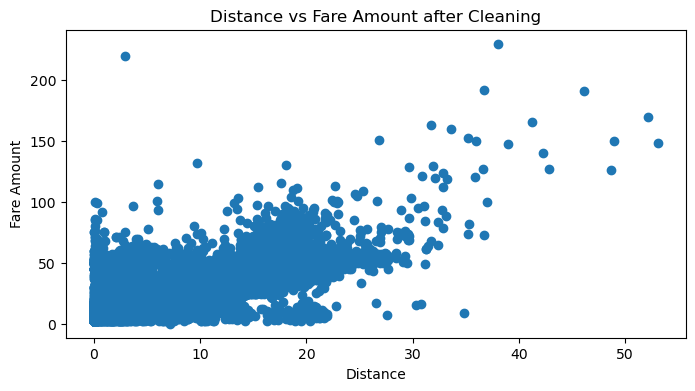

In [14]:
# Plot the cleaned data
plt.figure(figsize=(8, 4))
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")
plt.title("Distance vs Fare Amount after Cleaning")
plt.show()


In [15]:
# Create a new DataFrame with only the required columns
df2 = pd.DataFrame().assign(fare=df['fare_amount'], Distance=df['Distance'])

C:\Users\AYUSHI THAKUR\Desktop\codsoft\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


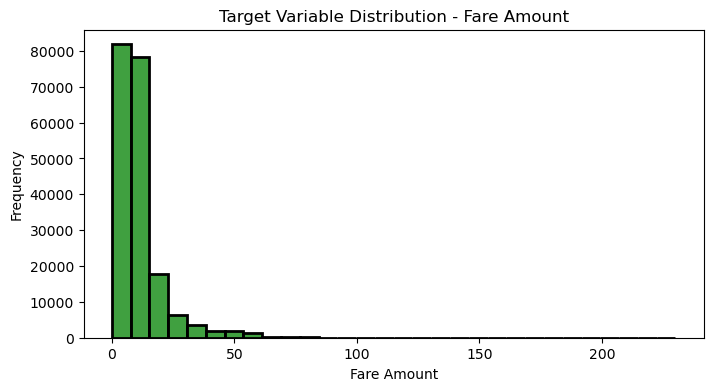

In [16]:
# Plot the distribution of the fare amount
plt.figure(figsize=[8, 4])
sns.histplot(df2['fare'], color='g', edgecolor="black", linewidth=2, bins=30)
plt.title('Target Variable Distribution - Fare Amount')
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Independent variable (Distance) and dependent variable (Fare)
X = df2['Distance'].values.reshape(-1, 1)
Y = df2['fare'].values.reshape(-1, 1)

In [18]:

# Standardize the data using StandardScaler
std = StandardScaler()
x_std = std.fit_transform(X)
y_std = std.fit_transform(Y)

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)


In [20]:
# Simple linear regression model
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)


LinearRegression()

In [21]:
# Predict test values
y_pred = l_reg.predict(X_test)

In [22]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.23979020298617273
Mean Squared Error: 0.19845894128014688
Root Mean Squared Error: 0.4454873076532561


In [23]:
# Final plots for training and test sets
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Standardized Fare')

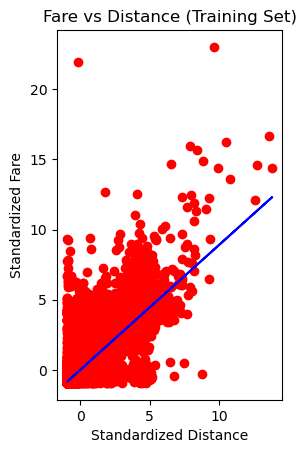

In [24]:

# Plot for Training Set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, l_reg.predict(X_train), color='blue')
plt.title("Fare vs Distance (Training Set)")
plt.xlabel("Standardized Distance")
plt.ylabel("Standardized Fare")

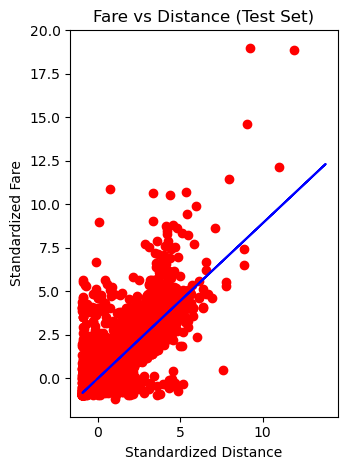

In [25]:
# Plot for Test Set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, l_reg.predict(X_train), color='blue')
plt.title("Fare vs Distance (Test Set)")
plt.xlabel("Standardized Distance")
plt.ylabel("Standardized Fare")

plt.tight_layout()
plt.show()